# Inaugural Project

Imports and set magics:

In [85]:
import numpy as np
import matplotlib.pylab as plt
from scipy import optimize
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

In [86]:
#In this question, we want to construct a function which solves equation (1). 
#Firstly, the utility function is defined by: 
def utility(w, l, m = 1, v = 10, epsilon = 0.3, tau0 = 0.4, tau1 = 0.1, kappa = 0.4):
    tax = tau0*w*l+tau1*np.fmax(w*l-kappa,0)
    c = m+w*l-tax
    utility = np.log(c)-v*l**(1+1/epsilon)/(1+1/epsilon)
    return utility,c, tax

#Next a function is created in order to maximize utility:
def solveconsumerproblem(w, m = 1, v = 10, epsilon = 0.3, tau0 = 0.4, tau1 = 0.1, kappa = 0.4,\
                         N=100, callableoutput=False, tax=False):


#Now, we want to create a set of emply local lists in order to store the outputs. 
    c_star = [0]
    l_star = [0]
    t_star = [0]
    utility_star = [-np.inf]

# Creating a range for labour in order to examine the utility for a given number of elements. 
    Range = np.linspace(0, 1, N)
    for i in Range:
        utility_temp = utility(l = i, w = w, epsilon = epsilon, tau0 = tau0, tau1 = tau1, kappa = kappa)
        if utility_temp[0]>utility_star:
            utility_star[0]=utility_temp[0]
            l_star[0] = i
            c_star[0] = utility_temp[1]
            t_star[0] = utility_temp[2]

#Setting requirements for tax, whether to display or not
    if tax == False:
        if callableoutput == False:
            print(f"It is found that (l*,c*) = ({l_star[0]:.3}, {c_star[0]:.3}) meaning that the optimal utility is given by u(c*,l*) = {utility_star[0]:.3}")  
        else:
            return utility_star[0], l_star[0], c_star[0]
    
    if tax == True:
            return utility_star[0], l_star[0], c_star[0], t_star[0]

solveconsumerproblem(w=0.6, tax=False, callableoutput=False)

It is found that (l*,c*) = (0.354, 1.13) meaning that the optimal utility is given by u(c*,l*) = 0.0943


# Question 2

Text(0, 0.5, 'Consumption')

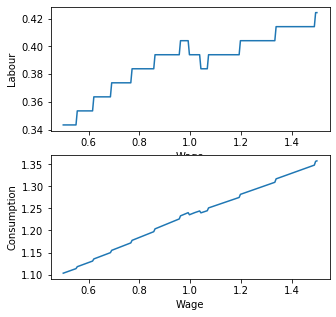

In [87]:
#Now we want to plot l* and c* as functions of w in the range 0.5 to 1.5

#In order to do so, we first define the range of w as: 
w_range = np.linspace(0.5, 1.5, 200) 

#As before, we create empty lists for later use:
l_list = []
c_list = []

#Lastly, we loop the w_range as follows:
for i in w_range:
    l_list.append(solveconsumerproblem(w = i, callableoutput=True)[1])
    c_list.append(solveconsumerproblem(w = i, callableoutput=True)[2])

#Now, the figures are ready to be created. This is done by: 
fig = plt.figure(figsize=(5,5))

# Fiure 1
ax = fig.add_subplot(2,1,1)
plt.plot(w_range,l_list)
ax.set_xlabel('Wage')
ax.set_ylabel("Labour")


#Figure 2
ax = fig.add_subplot(2,1,2)
ax.plot(w_range, c_list)
ax.set_xlabel('Wage')
ax.set_ylabel('Consumption')

# Question 3

In [88]:
#In order to calculate the tax revenue, we need to find the wage-level for different types of consumers. This is done by following:

np.random.seed(seed = 1337)
wage_list = np.random.uniform(low = 0.5, high = 1.5, size = 10000)

#Next, we wish to find the tax-revenue for a set of different wage-levels and parameters as:
def taxrev(wages, tau0, tau1, kappa, epsilon = 0.3):

#Again, an empty list is generated for output:
    tax_payments = []

#As seen before, we want to create a loop for wages, adding the indiviaual tax element in the function.
    for i in wages:
       tax_payments.append(solveconsumerproblem(w = i, tau0=tau0, tau1=tau1, epsilon=epsilon, kappa=kappa, callableoutput = True, tax = True)[-1]) 
    
#The sum of all calculated individual taxpayments are used in order to find the aggregated tax revenue:
    return np.sum(tax_payments)

#Last, we find the total tax revenue as:
print("Aggregated tax revenue is found as " + \
str(round(taxrev(wages = wage_list, tau0=0.4, tau1=0.1, kappa=0.4, epsilon=0.3),2)))

Aggregated tax revenue is found as 1633.53


# Question 4

In [89]:
#Now, we wish to examine the aggregated tax revenue for epsilon=0.1. This is solely done by running the above function, setting epsilon=0.1 as follows:

print("For epsilon=0.1, the aggregated tax revenue is " + \
str(round(taxrev(wages = wage_list, tau0=0.4, tau1=0.1, kappa=0.4, epsilon=0.1),2)))

For epsilon=0.1, the aggregated tax revenue is 3204.49


# Question 5

In [90]:
#We now consider a politician, who wishes to maximize tax revenue. In order to find the 

# Conclusion

ADD CONCISE CONLUSION.